In [ ]:
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install pandas
!conda install -c conda-forge python-graphviz

You should consider upgrading via the '/home/rit/neural_net_karpathy/.venv/bin/python -m pip install --upgrade pip' command.
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached pillow-11.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached fonttools-4.56.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (324 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
You should consider upgrading via the '/home/rit/neural_net_karpathy/.venv/bin/python -m pip install --upgrade pip' command.
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Usin

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    # op to define operation
    # children to store the children of the value
    # data to store the value
    def __init__(self, data, _children=(), _op='',label=''):
        self.data = data
        self.grad=0.0 # gradient of the value
        self._backward= lambda: None # backward propagation
        self._prev = set(_children)
        self._op = _op
        self.label= label
    # __ method used to define operator like add, subtract, multiply, divide
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other), '+') # self, other are children of the value
        def _backward():
            self.grad += 1.0 * out.grad # local derivative of self is 1.0 so 1.0 * out.grad <----- chain rule for + operator
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other),'*')
        def _backward():
            # a problem might appear if expression is b= a+a and db/da shd be 2 but it gives 1 if we dont put + = after self.grad and after other.grad
            # so we need to add the gradient to the existing gradient for all expressions to avoid problem incase of repetation of variables or multivariables
            self.grad += other.data * out.grad # local derivative of self is other.data so other.data * out.grad <----- chain rule for * operator
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        # def _backward():
        #     self.grad += 1.0 * out.grad
        #     other.grad += 1.0 * out.grad
        # out._backward = _backward
        return out
    
    def __truediv__(self, other):
        if isinstance(other, Value):
            out = Value(self.data / other.data, (self, other), '/')
        else:
            out = Value(self.data / other, (self,), '/')
        def _backward():
            self.grad += other.data / out.grad
            other.grad += self.data / out.grad
        out._backward = _backward
        return out
    
    def __tanh__(self):
        x = self.data
        # tan h formula
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # derivative of tanh is 1 - tanh^2 so (1 - t**2) * out.grad <----- chain rule for tanh operator
        out._backward = _backward
            
        return out
    
    def backward(self):
        # topological sort of the graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
            # self that is the input o node will add itself after all the children have been processed
            # so that the gradient is calculated correctly
        build_topo(self)
        
        self.grad = 1.0
        # as o shd start from 1 and goes topologically in reverse order
        for node in reversed(topo):
            node._backward()

    # to return the value
    def __repr__(self):
        return f"Value(data={self.data})"

# Example usage
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [86]:
def lol():
    h=0.0001
    a= Value(2.0, label='a')
    b= Value(-3.0, label='b') # add ing 2 object function is required
    c= Value(10.0, label='c|')
    e= a*b
    e.label='e'
    d= e+c
    d.label='d'
    f= Value(-2.0,label='f')
    L= d*f
    L.label='L'
    L1=L # L is the loss function so in back propogation we wish to know derevetive of the leaf nodes a,b,c,d,e,f wrt L
    # so we need to calculate the gradient of L wrt a,b,c,d,e,f
    a= Value(2.0+h, label='a')
    b= Value(-3.0, label='b') # add ing 2 object function is required
    c= Value(10.0, label='c')
    e= a*b
    e.label='e'
    d= e+c
    d.label='d'
    f= Value(-2.0,label='f')
    L= d*f
    L.label='L'
    L2=L # L is the loss function so in back propogation we wish to know derevetive of the leaf nodes a,b,c,d,e,f wrt L
    # so we nee
    # d to calculate the gradient of L wrt a,b,c,d,e,f

    print('L1:',L1)
    print('L2:',L2)
    print('L1-L2:',(L1-L2)/h) # gradient of L wrt a

lol()

L1: Value(data=-8.0)
L2: Value(data=-7.999399999999998)
L1-L2: Value(data=-6.000000000021544)


In [87]:
# manually setting te derivatives or gradients
def lol():
    h=0.0001
    a= Value(2.0, label='a')
    b= Value(-3.0, label='b') # add ing 2 object function is required
    c= Value(10.0, label='c')
    e= a*b
    e.label='e'
    d= e+c
    d.label='d'
    f= Value(-2.0,label='f')
    L= d*f
    L.label='L'
    L1=L # L is the loss function so in back propogation we wish to know derevetive of the leaf nodes a,b,c,d,e,f wrt L
    # so we need to calculate the gradient of L wrt a,b,c,d,e,f
    a.grad= -6.0
    b.grad= 2.0
    c.grad= -2.0
    d.grad= -2.0
    e.grad= -2.0
    f.grad= 10.0
    print('a.grad:',a.grad)
    print('b.grad:',b.grad)
    print('c.grad:',c.grad)
    print('d.grad:',d.grad)
    print('e.grad:',e.grad)
    print('f.grad:',f.grad)
    print("before changing the data by alpha",L.data)

    # to increase positively in L 

    a.data+=0.01 * a.grad
    b.data+=0.01 * b.grad
    c.data+=0.01 * c.grad
    d.data+=0.01 * d.grad
    e.data+=0.01 * e.grad
    f.data+=0.01 * f.grad
    print('a.data:',a.data)
    print('b.data:',b.data)
    print('c.data:',c.data)
    print('d.data:',d.data)
    print('e.data:',e.data)
    print('f.data:',f.data)
    e= a*b
    d= e+c
    L= d*f
    print("after changing the data by alpha",L.data)
lol()

a.grad: -6.0
b.grad: 2.0
c.grad: -2.0
d.grad: -2.0
e.grad: -2.0
f.grad: 10.0
before changing the data by alpha -8.0
a.data: 1.94
b.data: -2.98
c.data: 9.98
d.data: 3.98
e.data: -6.02
f.data: -1.9
after changing the data by alpha -7.977720000000001


#### derivative L with respect to f =f
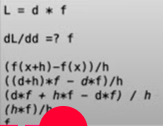

In [88]:
d._prev # resultnt fram a*b and c

{Value(data=-6.0), Value(data=10.0)}

In [89]:
d._op # operation performed

'+'

In [90]:

!pip install micrograd

In [91]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot
# # a very simple example
# x = Value(1.0)
# y = (x * 2 + 1).relu()
# y.backward()
# draw_dot(y)
# # a simple 2D neuron
# import random
# from micrograd import nn

# random.seed(1337)
# n = nn.Neuron(2)
# x = [Value(1.0), Value(-2.0)]
# y = n(x)
# y.backward()

# dot = draw_dot(y)
# dot
# dot.render('gout')

#### This is how d is vizualized using graphviz

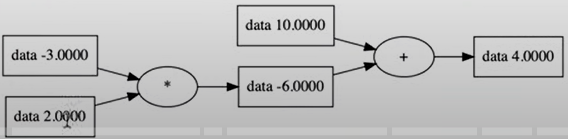

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


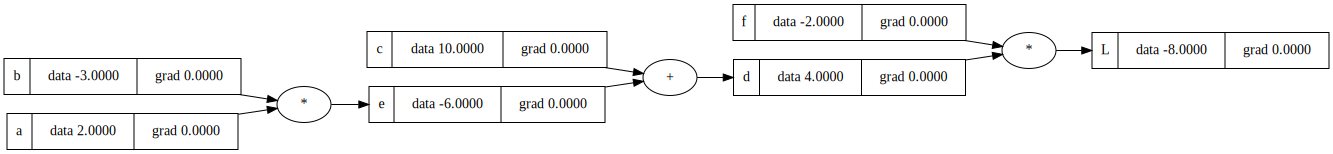

In [92]:
draw_dot(L)

In [93]:
import graphviz
import graphviz
print(graphviz.__file__)  # Check where the graphviz package is installed
print(graphviz.__version__)  # Check the installed version



/home/rit/neural_net_karpathy/.venv/lib/python3.10/site-packages/graphviz/__init__.py
0.20.3


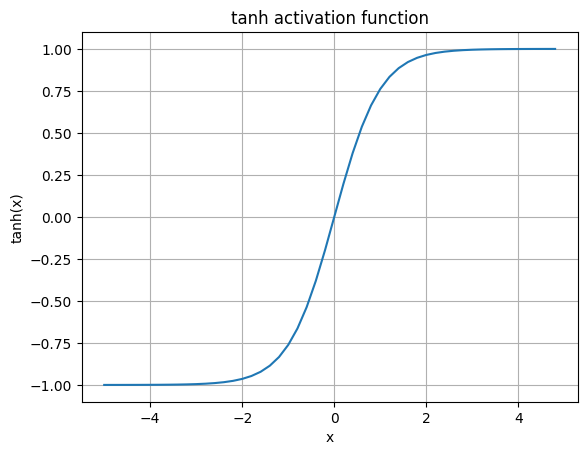

In [94]:
# Activation function tanh
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))
plt.grid()
plt.title('tanh activation function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()

In [95]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# increasing bias
# b = Value(8.0, label='b') #increases the output to 1 max value of tanh
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function
o = n.__tanh__(); o.label = 'o'

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


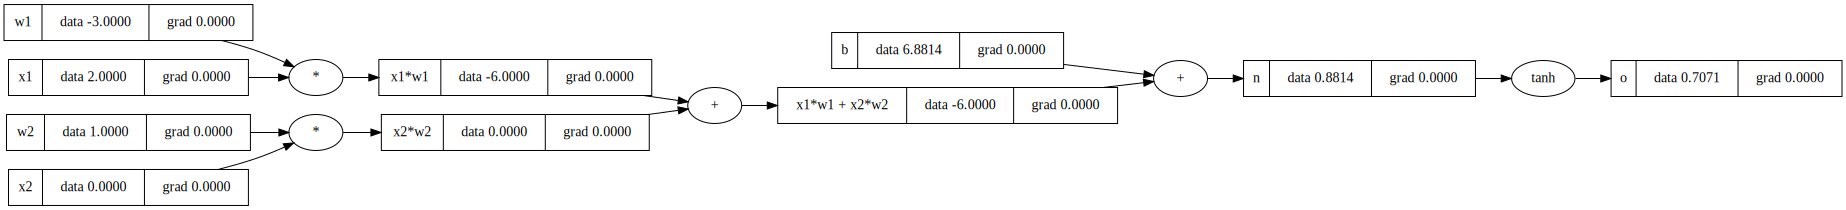

In [96]:

draw_dot(o)

In [97]:
# Manual Backpropagation
o.grad = 1.0
n.grad= 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
print('x1.grad:',x1.grad)
print('x2.grad:',x2.grad)
print('w1.grad:',w1.grad)
print('w2.grad:',w2.grad)
print('b.grad:',b.grad)
print('n.grad:',n.grad)
print('x1w1.grad:',x1w1.grad)
print('x2w2.grad:',x2w2.grad)
print('x1w1x2w2.grad:',x1w1x2w2.grad)
print('o.grad:',o.grad)


x1.grad: -1.5
x2.grad: 0.5
w1.grad: 1.0
w2.grad: 0.0
b.grad: 0.5
n.grad: 0.5
x1w1.grad: 0.5
x2w2.grad: 0.5
x1w1x2w2.grad: 0.5
o.grad: 1.0


In [98]:
# Formulae
# L = f(o)
# o=tanh(n)
# d(o)/d(n) = 1 - o^2
# d(n)/d(x1) = w1
# d(n)/d(x2) = w2
# d(n)/d(w1) = x1
# d(n)/d(w2) = x2
# d(n)/d(b) = 1
# d(L)/d(o) = f
# d(L)/d(n) = d(L)/d(o) * d(o)/d(n)
# d(L)/d(x1) = d(L)/d(n) * d(n)/d(x1)
# d(L)/d(x2) = d(L)/d(n) * d(n)/d(x2)
# d(L)/d(w1) = d(L)/d(n) * d(n)/d(w1)
# d(L)/d(w2) = d(L)/d(n) * d(n)/d(w2)
# d(L)/d(b) = d(L)/d(n) * d(n)/d(b)

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


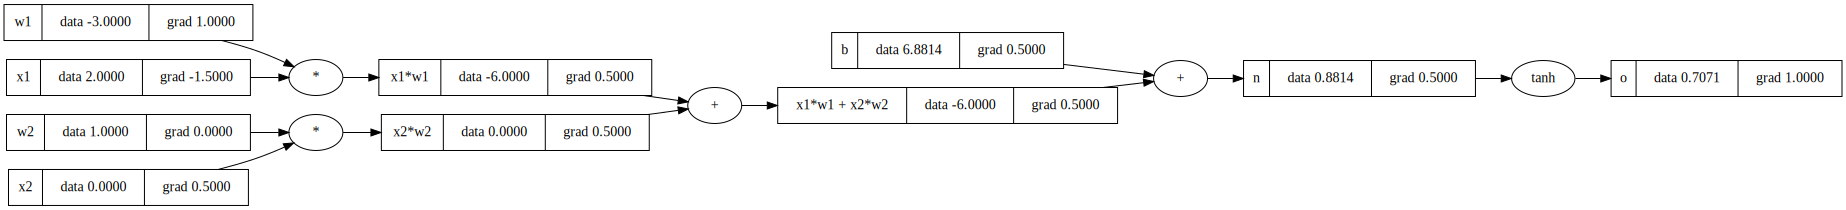

In [99]:
draw_dot(o)

In [100]:
# lets do that back propogation in function code in class Value above
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# increasing bias
# b = Value(8.0, label='b') #increases the output to 1 max value of tanh
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function
o = n.__tanh__(); o.label = 'o'

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


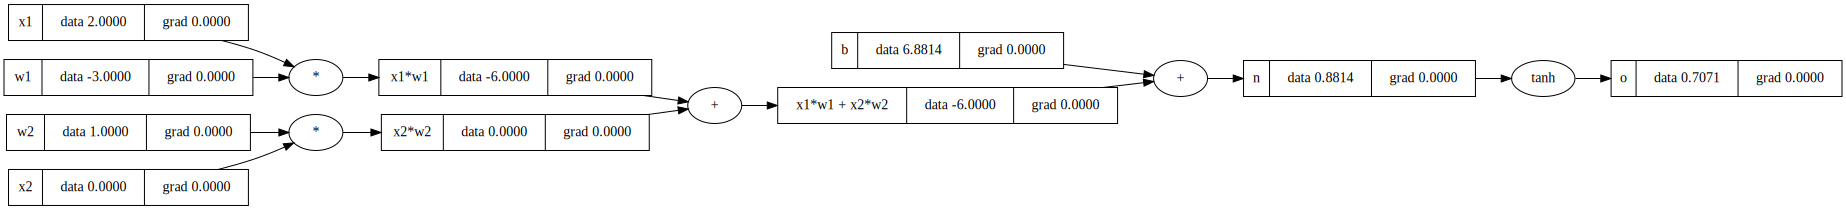

In [101]:
draw_dot(o)

In [102]:
o.grad=1.0
o._backward()
n._backward()

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


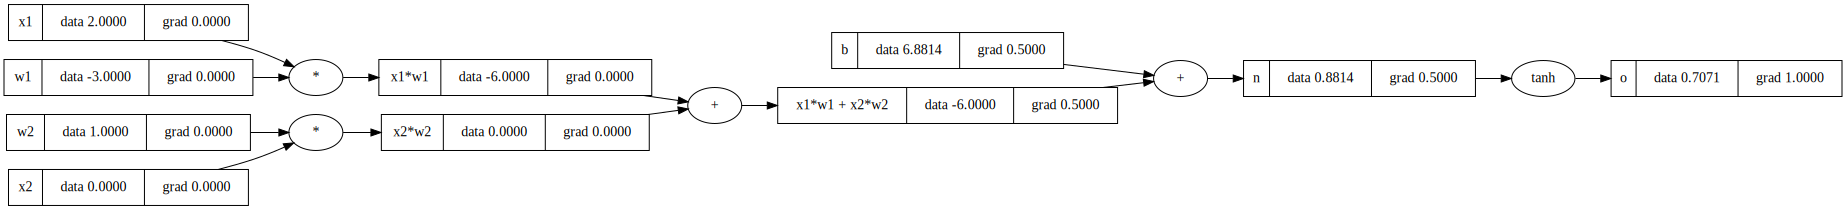

In [103]:
draw_dot(o)

In [104]:
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


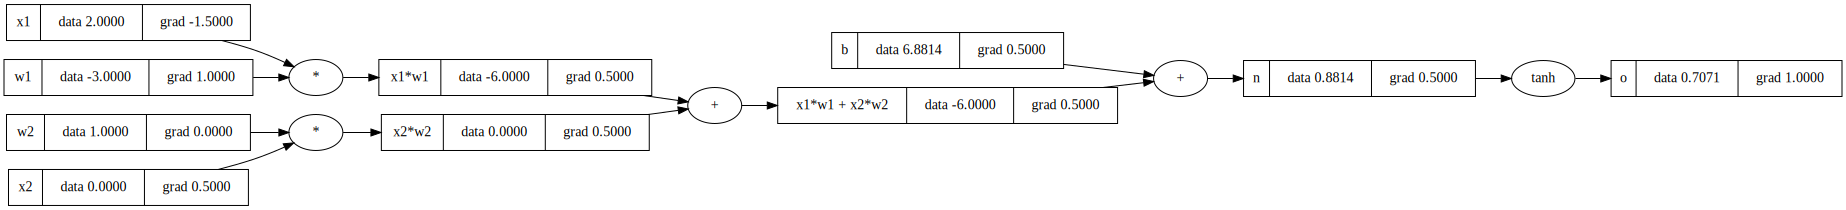

In [105]:
draw_dot(o)

In [106]:
# instead of calling bakward manually we can use the code in above class Value
# reset the gradients
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# increasing bias
# b = Value(8.0, label='b') #increases the output to 1 max value of tanh
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# activation function
o = n.__tanh__(); o.label = 'o'

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


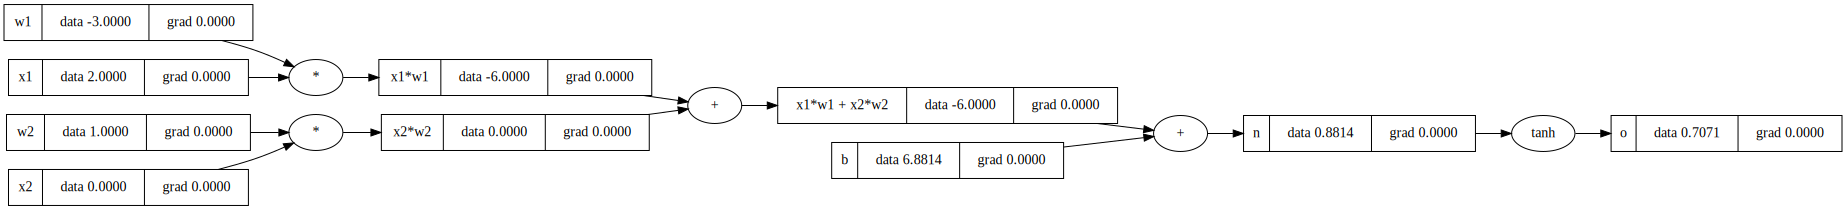

In [107]:
draw_dot(o)


In [108]:
o.backward()

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


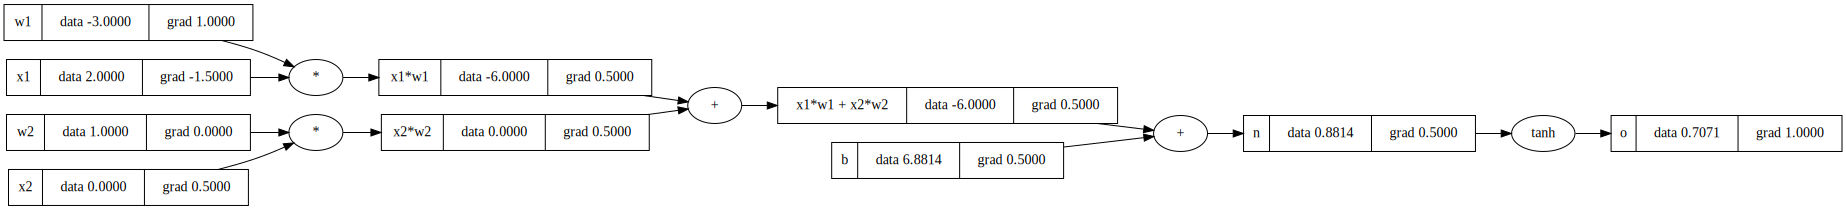

In [109]:
draw_dot(o)


Fontconfig warning: ignoring C.UTF-8: not a valid language tag


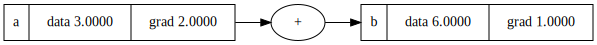

In [110]:
# why we use += in the gradients in claculations of _backward is written above in class
# and shown example here

a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

Fontconfig warning: ignoring C.UTF-8: not a valid language tag


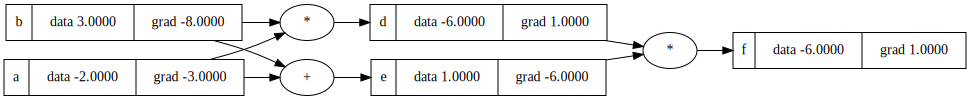

In [111]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)